# BUSINESS PROBLEM

A US airline has approached our data science company and they are interested in knowing how they can optimise the arrival delays of their flights. We have found a dataset that solves this problem and answered 6 questions the airline was interested in finding out about for the EDA.
#Our mission is to develop a robust and high performing model that can predict the arrival delays based on certain predictor variables.
This mission is essential to the business of our client in terms of minimising the amounts of delay claims that comes through their websites and the amount they have to pay out each time thereby increasing annual profit.  Being able to predict arrival delay informs the business on how they can better treat their customers and plan their schedule wisely and if there will be a delay, they can make sure their customers still have a satisfactory experience on their flights.

# 1. DATA CLEANING

In [61]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('flight_delays.csv')

In [3]:
from datacleaning import clean_data


In [4]:
clean_data(df)

,Month,DayofMonth,Hour,Origin,Dest,SchedDep,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,FlightNumber,Temp,Humidity,Wind,Pressure,Description,Delay_min
0,1,1,22,DFW,MIA,1900-01-01 21:20:00,1900-01-01 22:04:00,84.0,139.0,73.0,136.0,AA2329,65.01,77.0,2.0,1009.0,broken clouds,44.0
1,1,1,22,DFW,LAX,1900-01-01 22:10:00,1900-01-01 22:16:00,6.0,2353.0,9.0,184.0,AA1023,65.01,77.0,2.0,1009.0,broken clouds,6.0
2,1,1,22,DFW,ORD,1900-01-01 21:30:00,1900-01-01 22:20:00,90.0,19.0,74.0,98.0,AA1040,65.01,77.0,2.0,1009.0,broken clouds,50.0
3,1,1,22,DFW,ORD,1900-01-01 22:15:00,1900-01-01 22:08:00,-7.0,2400.0,-30.0,95.0,AA2525,65.01,77.0,2.0,1009.0,broken clouds,-7.0
4,1,1,18,LAX,ORD,1900-01-01 17:50:00,1900-01-01 18:37:00,87.0,21.0,58.0,200.0,AA2576,47.59,81.0,3.0,1014.0,fog,47.0
5,1,1,18,LAX,ORD,1900-01-01 18:01:00,1900-01-01 18:41:00,40.0,16.0,12.0,198.0,UA342,47.59,81.0,3.0,1014.0,fog,40.0
6,1,1,9,LAX,ORD,1900-01-01 09:45:00,1900-01-01 09:57:00,12.0,1539.0,-10.0,202.0,NK730,45.48,87.0,0.0,1012.0,sky is clear,12.0
7,1,1,9,LAX,JFK,1900-01-01 09:00:00,1900-01-01 09:34:00,34.0,1809.0,42.0,289.0,AA2,45.48,87.0,0.0,1012.0,sky is clear,34.0
8,1,1,9,LAX,ORD,1900-01-01 09:45:00,1900-01-01 09:55:00,10.0,1553.0,-6.0,206.0,AA110,45.48,87.0,0.0,1012.0,sky is clear,10.0
9,1,1,9,LAX,DFW,1900-01-01 09:32:00,1900-01-01 09:30:00,-2.0,1444.0,-4.0,160.0,OO5614,45.48,87.0,0.0,1012.0,sky is clear,-2.0


## 2. EXPLORATORY DATA ANALYSIS

### For the Exploratory Data Analysis for the flights delay dataset. The airline company which is our client has asked us to make five key findings in our data-
1.Which airports have the highest and lowest average delay minutes amongst LAX(LOS ANGELES INTERNATIONAL), MIA(MIAMI INTERNATIONAL), ORD(O'HARE INETERNATIONAL(CHICAGO)), DFW(DALLAS/FORT WORTH INTERNATIONAL), JFK( JOHN F KENNEDY INTERNATIONAL (NEW YORK))?
#2.Which months have the highest and lowest average delay minutes amongst the months of travel?
#3.Which days have the highest and lowest average delay minutes amongst the days of travel?
#4.Which airports have the highest and lowest average windspeed(in terms of how terrible the weather tends to be)?
#5.Which hours of the day have the highest and lowest average delay minutes across all the international airports ?
#6.Which international airports have the highest and lowest average Arrival delay minutes?

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [13]:
data = pd.read_csv('final_flight_data')

In [14]:
data.describe() # checking the summary statistics for the whole dataset

,Month,DayofMonth,Hour,DepDelay,ArrTime,ArrDelay,AirTime,Temp,Humidity,Wind,Pressure,Delay_min
count,66180.000000,66180.000000,66180.000000,66180.000000,66180.000000,66180.000000,66180.000000,66180.000000,66180.000000,66180.000000,66180.000000,66180.000000
mean,5.557555,15.647069,13.151768,9.923557,1464.182835,2.852750,199.996117,64.990914,69.226564,3.023572,1015.452100,6.292248
std,2.825465,8.711347,5.208588,41.260527,612.027619,45.143657,73.937732,15.919047,19.344586,2.176053,7.825241,25.855059
min,1.000000,1.000000,0.000000,-28.000000,1.000000,-77.000000,80.000000,0.270000,5.000000,0.000000,942.000000,-28.000000
25%,3.000000,8.000000,9.000000,-4.000000,1102.000000,-17.000000,144.000000,55.780000,56.000000,1.000000,1012.000000,-4.000000
50%,6.000000,16.000000,13.000000,-1.000000,1541.000000,-7.000000,172.000000,67.050000,72.000000,3.000000,1016.000000,-1.000000
75%,8.000000,23.000000,17.000000,6.000000,1942.000000,8.000000,271.000000,76.860000,83.000000,4.000000,1019.000000,6.000000
max,10.000000,31.000000,23.000000,1184.000000,2400.000000,1168.000000,408.000000,102.870000,100.000000,18.000000,1043.000000,704.000000


Overall from the summary statistics of the dataset we can glean from this informatiuon that most flights are recorded in the month of June, Most flights are recorded on the 15th day of the month and also most of the flights are recorded for 13:00 Hours. And also the average amount of time of time spent in the air is 172 minutes(1 hour and 12 minutes). Average Temperature across all airports for this dataset is 67 degree Fahreint and the average windspeed across all the airports is 3.0

In [18]:
from analysis import explore_data

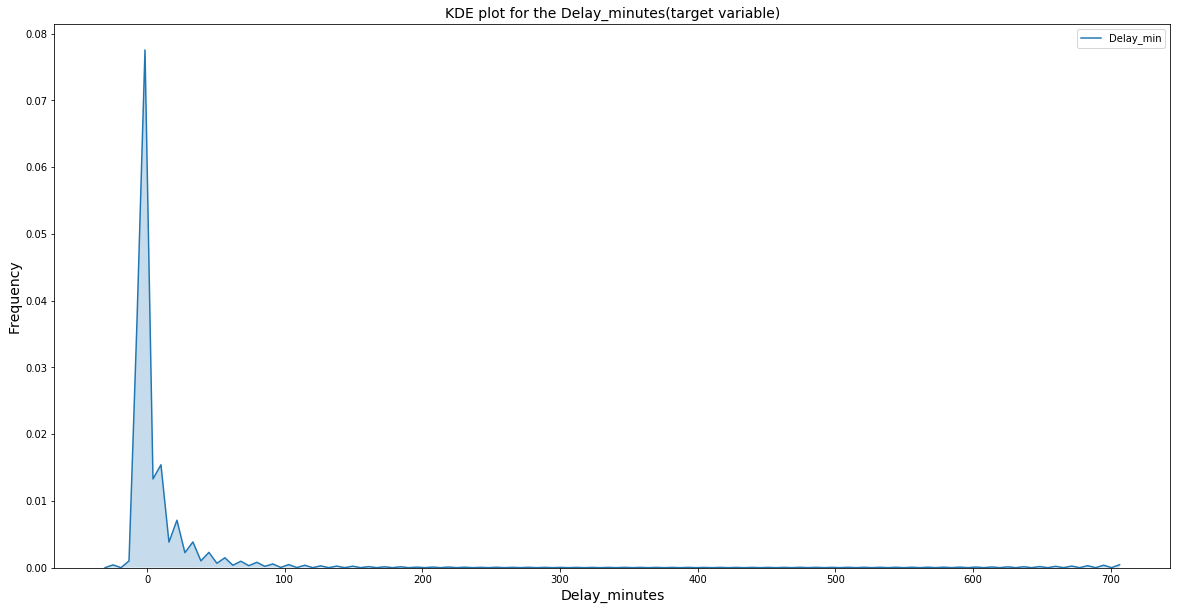

In [19]:
explore_data(data)

This plot tells us that the target variable (delay_minutes) is definitely not normal and there are a lot of outliers in the dataset. Which probably means there are a lot of flights delayed for overly long times across all the airports

In [21]:
from analysis import questions_viz

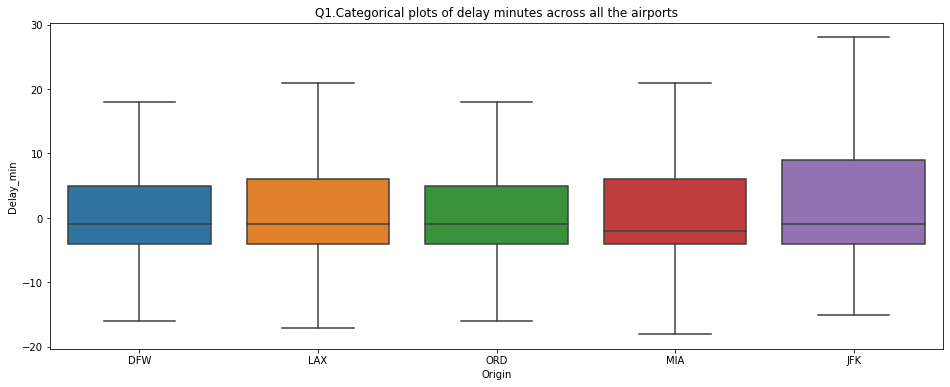

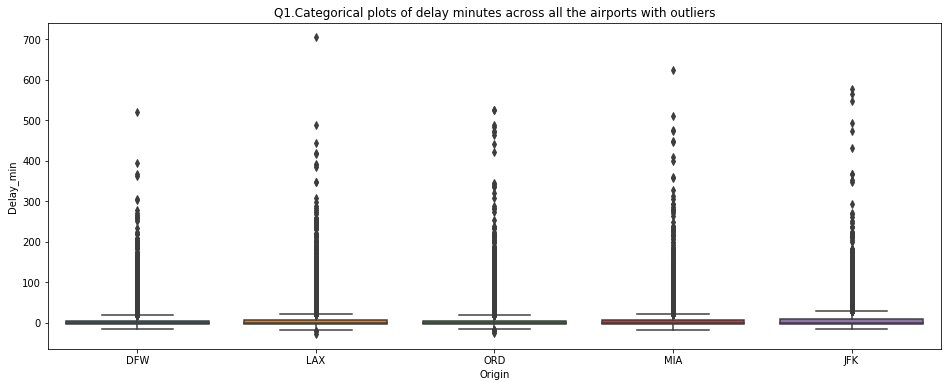

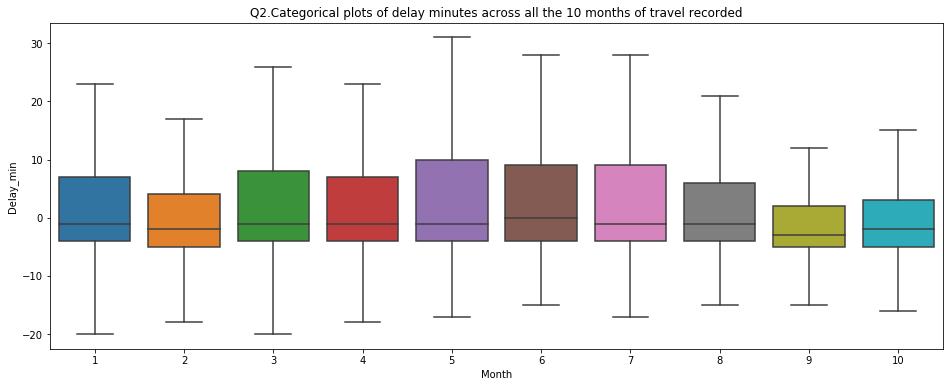

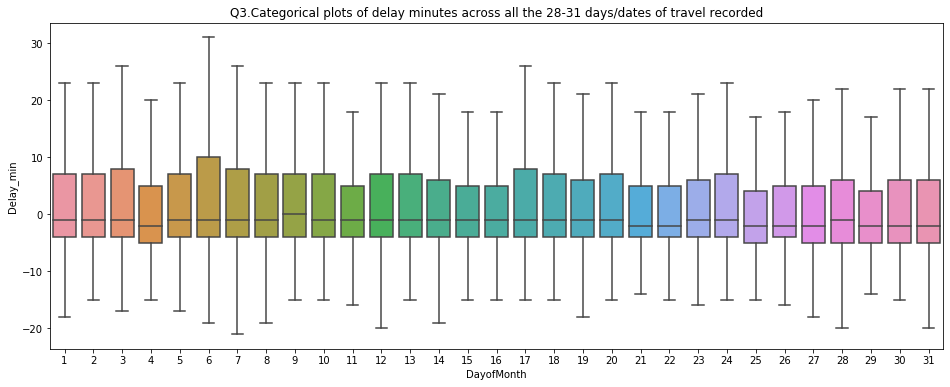

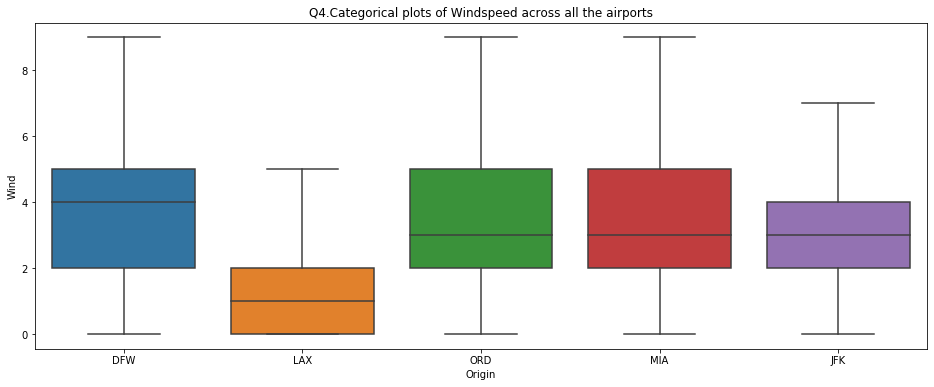

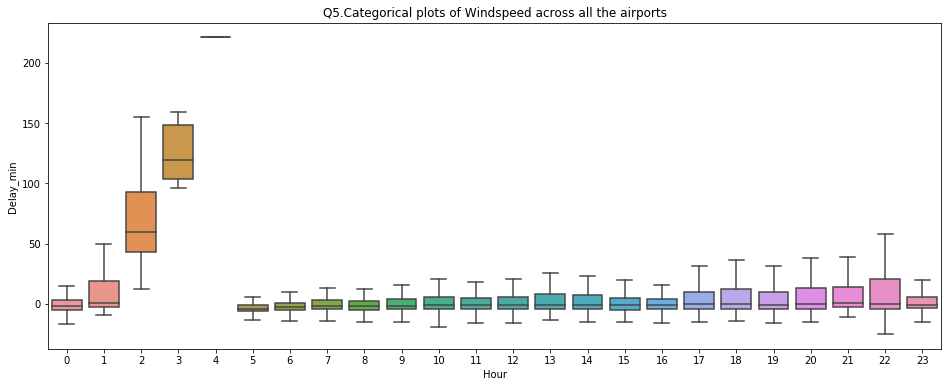

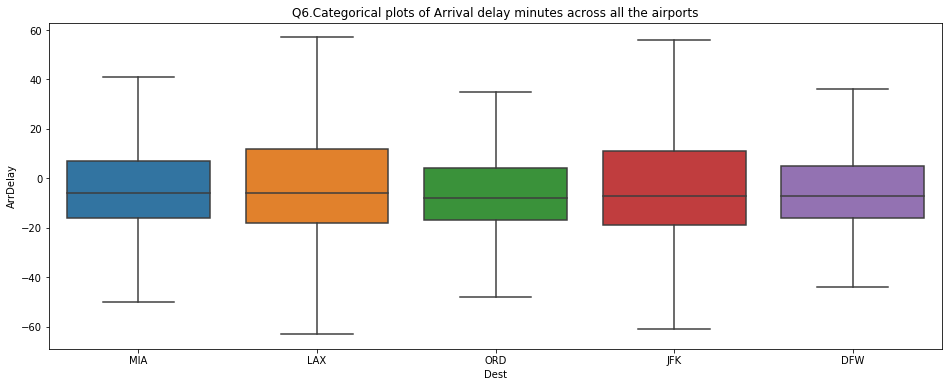

In [22]:
questions_viz(data)

### 1.Which airports have the highest and lowest average delay minutes amongst LAX(LOS ANGELES INTERNATIONAL), MIA(MIAMI INTERNATIONAL), ORD(O'HARE INETERNATIONAL(CHICAGO)), DFW(DALLAS/FORT WORTH INTERNATIONAL), JFK( JOHN F KENNEDY INTERNATIONAL (NEW YORK))?

Refering to the Q1.plot above. According to the measures of centrality of the above plot, Miami International Airport performs best in having their average delay minutes below zero but JFK seems to be the worst airport in terms of the average delay minutes and the airport also has the maximum value of delay minutes and the plot below shows when we output the outliers for the dataset

Using the summary statistics, the  median for DFW, ORD, LAX AND JFK are all -1.0 minute delay except fro MIA which is -2.0 minutes delay. We can clearly determine Miami is the lowest on average but since all the other 4 aiports share the same median, but JFK has the biggest mean value and that makes it the highest on average in terms of delay minutes

### 2.Which months have the highest and lowest average delay minutes amongst the months of travel?

Refering to the Q2.plot above. We can glean from the plot above that the highest average in terms of delay minutes occurs in the month of June and lowest occurs in the month of either September or February. To find out for certain..we can call the describe method on the dataframes

In [24]:
data[data['Month'] == 2].describe()

,Month,DayofMonth,Hour,DepDelay,ArrTime,ArrDelay,AirTime,Temp,Humidity,Wind,Pressure,Delay_min
count,5843.0,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000
mean,2.0,14.693822,13.124765,7.487763,1487.003594,-1.405614,199.031833,50.834484,74.479548,3.108335,1012.530721,4.557761
std,0.0,8.101348,5.041085,35.700353,583.839681,39.943834,76.741214,15.534833,19.996184,2.189203,16.902398,22.442811
min,2.0,1.000000,0.000000,-25.000000,1.000000,-77.000000,80.000000,12.220000,16.000000,0.000000,942.000000,-25.000000
25%,2.0,8.000000,9.000000,-5.000000,1129.000000,-20.000000,140.000000,40.390000,59.000000,1.000000,1009.000000,-5.000000
50%,2.0,15.000000,13.000000,-2.000000,1548.000000,-9.000000,172.000000,50.820000,77.000000,3.000000,1017.000000,-2.000000
75%,2.0,22.000000,17.000000,4.000000,1938.000000,5.000000,261.000000,62.110000,93.000000,5.000000,1021.000000,4.000000
max,2.0,28.000000,23.000000,763.000000,2400.000000,722.000000,400.000000,86.810000,100.000000,18.000000,1043.000000,443.000000


In [25]:
data[data['Month'] == 9].describe()

,Month,DayofMonth,Hour,DepDelay,ArrTime,ArrDelay,AirTime,Temp,Humidity,Wind,Pressure,Delay_min
count,6537.0,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000
mean,9.0,15.807098,13.292795,3.955790,1490.182500,-4.885421,197.895212,72.770678,67.784458,2.352302,1015.025700,2.058896
std,0.0,8.726251,5.132778,32.516873,606.146725,36.318615,72.602638,10.141191,18.223232,1.714277,4.376793,20.749874
min,9.0,1.000000,0.000000,-28.000000,1.000000,-68.000000,87.000000,46.260000,7.000000,0.000000,1005.000000,-28.000000
25%,9.0,8.000000,9.000000,-5.000000,1124.000000,-20.000000,144.000000,65.750000,55.000000,1.000000,1012.000000,-5.000000
50%,9.0,16.000000,13.000000,-3.000000,1609.000000,-10.000000,168.000000,72.160000,69.000000,2.000000,1014.000000,-3.000000
75%,9.0,23.000000,17.000000,2.000000,1945.000000,1.000000,273.000000,80.600000,82.000000,3.000000,1018.000000,2.000000
max,9.0,30.000000,23.000000,1023.000000,2400.000000,1045.000000,364.000000,100.650000,100.000000,11.000000,1032.000000,623.000000


From the summary statistics above it is clear to see that the month with the lowest average for delay minutes is September

### 3.Which days have the highest and lowest average delay minutes amongst the days of travel?

Refering to Q3.plot above. There is a trend in the plot above as we see that the averages for each day of the month lie around zero at the beginning of the month and at the end of the month, the averages go down with less delays aas average but there are also strong outliers at both end of the spectrum, most especially on the 6th day of the month

### 4.Which airports have the highest and lowest average windspeed(in terms of how terrible the weather tends to be)?

Refering to Q4.plot above. We can definitely confirm from the plot above that the Dallas Forth Worth International, Texas has the worst conditions for wind speed and Los Angeles International airport has the best conditions in terms of the wind speed.
This might give us sa littele bit of information on which of the airports' services might get disrupted by weather

### 5.Which hours of the day have the highest and lowest average delay minutes across all the international airports ?

Refering to the Q5.plot above. We can confirm that the hours of between 02:00 - 03:00 are the worst to travel across all 5 airports as the average delay_min is about 120 minutes and the best times to travel across all 5 airports are between 23:00- 00:00 hours.
We can also say the least bsusiest and lowest average delay time occurs between 05:00 - 08:00 hours across all 5 airports

### 6.Which international airports have the highest and lowest average Arrival delay miniutes?

Refering to the Q6.plot above and the summary statistics below, it is evident that Miami International airport, has the highest average delay minutes in arrival followed by Los Angeles International and the lowest average for arrival delay is O'Hare International Airport Chicago.

In [38]:
data[data['Dest'] == 'ORD'].describe()

,Month,DayofMonth,Hour,DepDelay,ArrTime,ArrDelay,AirTime,Temp,Humidity,Wind,Pressure,Delay_min
count,15449.000000,15449.000000,15449.000000,15449.000000,15449.000000,15449.000000,15449.000000,15449.000000,15449.000000,15449.000000,15449.000000,15449.000000
mean,5.579520,15.622241,12.831186,6.691695,1471.352385,0.157939,160.694220,69.355719,68.654411,2.864975,1015.174186,3.799599
std,2.811562,8.730254,5.431138,37.375049,586.768953,40.969948,44.354798,13.025611,18.571980,2.138921,7.701548,23.501784
min,1.000000,1.000000,0.000000,-18.000000,1.000000,-58.000000,80.000000,12.720000,5.000000,0.000000,942.000000,-18.000000
25%,3.000000,8.000000,9.000000,-5.000000,1045.000000,-17.000000,112.000000,61.300000,57.000000,1.000000,1013.000000,-5.000000
50%,6.000000,16.000000,13.000000,-2.000000,1546.000000,-8.000000,164.000000,70.520000,71.000000,2.000000,1015.000000,-2.000000
75%,8.000000,23.000000,17.000000,3.000000,1931.000000,4.000000,205.000000,79.250000,83.000000,4.000000,1018.000000,3.000000
max,10.000000,31.000000,23.000000,1184.000000,2400.000000,1168.000000,312.000000,102.870000,100.000000,18.000000,1042.000000,704.000000


In [39]:
data[data['Dest'] == 'MIA'].describe()

,Month,DayofMonth,Hour,DepDelay,ArrTime,ArrDelay,AirTime,Temp,Humidity,Wind,Pressure,Delay_min
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000
mean,5.434302,15.790729,11.924376,9.065186,1431.355915,2.696787,172.924273,61.239376,69.115432,3.230147,1015.368297,5.864204
std,2.807596,8.719260,5.296772,41.283484,556.564678,44.354805,50.581585,16.630919,19.520623,2.177456,7.941550,25.746934
min,1.000000,1.000000,0.000000,-28.000000,1.000000,-63.000000,115.000000,0.860000,5.000000,0.000000,943.000000,-28.000000
25%,3.000000,8.000000,8.000000,-4.000000,1051.000000,-16.000000,143.000000,50.680000,55.000000,2.000000,1012.000000,-4.000000
50%,5.000000,16.000000,11.000000,-1.000000,1454.000000,-6.000000,152.000000,64.040000,71.000000,3.000000,1015.000000,-1.000000
75%,8.000000,23.000000,16.000000,5.000000,1851.000000,7.000000,166.000000,73.290000,86.000000,5.000000,1019.000000,5.000000
max,10.000000,31.000000,23.000000,885.000000,2400.000000,883.000000,343.000000,102.870000,100.000000,16.000000,1043.000000,525.000000


In [40]:
data[data['Dest'] == 'LAX'].describe()

,Month,DayofMonth,Hour,DepDelay,ArrTime,ArrDelay,AirTime,Temp,Humidity,Wind,Pressure,Delay_min
count,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000
mean,5.583799,15.583046,13.897321,10.315082,1471.879572,3.435886,260.321267,62.957324,67.075731,3.564275,1016.396192,6.836166
std,2.810201,8.701023,4.861311,38.663386,600.391789,43.640134,65.121430,17.955778,19.921544,2.099576,7.036935,24.364238
min,1.000000,1.000000,1.000000,-15.000000,1.000000,-77.000000,140.000000,0.270000,12.000000,0.000000,989.000000,-15.000000
25%,3.000000,8.000000,9.000000,-4.000000,1124.000000,-18.000000,216.000000,50.900000,52.000000,2.000000,1013.000000,-4.000000
50%,6.000000,16.000000,14.000000,-1.000000,1525.000000,-6.000000,248.000000,66.490000,69.000000,3.000000,1016.000000,-1.000000
75%,8.000000,23.000000,18.000000,8.000000,1948.000000,12.000000,321.000000,76.800000,83.000000,5.000000,1020.000000,8.000000
max,10.000000,31.000000,23.000000,964.000000,2400.000000,946.000000,408.000000,100.890000,100.000000,18.000000,1043.000000,576.000000


## DATA DISTRIBUTION CHECKS FOR ALL THE ASSUMPTIONS OF LINEAR REGRESSION MODELLING

### MULTI-COLLINEARITY CHECK AND LINEARITY CHECK

In [41]:
from analysis import assumptions_check

                 Month  DayofMonth        Hour    DepDelay     ArrTime  \
Month       100.000000   -1.523735    1.301310   -2.301162   -0.674581   
DayofMonth   -1.523735  100.000000   -0.020886   -1.940067   -0.134765   
Hour          1.301310   -0.020886  100.000000   12.561855   19.361388   
DepDelay     -2.301162   -1.940067   12.561855  100.000000   -2.041094   
ArrTime      -0.674581   -0.134765   19.361388   -2.041094  100.000000   
ArrDelay     -2.154012   -2.290749   10.541220   92.115501   -1.732436   
AirTime      -1.168575   -0.386473    3.598157    2.168791   -3.888887   
Temp         54.168044    5.757185   21.062121    2.583043   -3.888497   
Humidity     -6.568162   -0.894739  -35.327290   -1.460253    1.330354   
Wind        -15.628156    0.325750   23.927500    4.135390   -0.718162   
Pressure     -3.180126  -10.027590    2.434353   -1.917790    4.422646   
Delay_min    -2.855008   -2.109944   12.645100   98.236551   -1.590244   

              ArrDelay     AirTime   

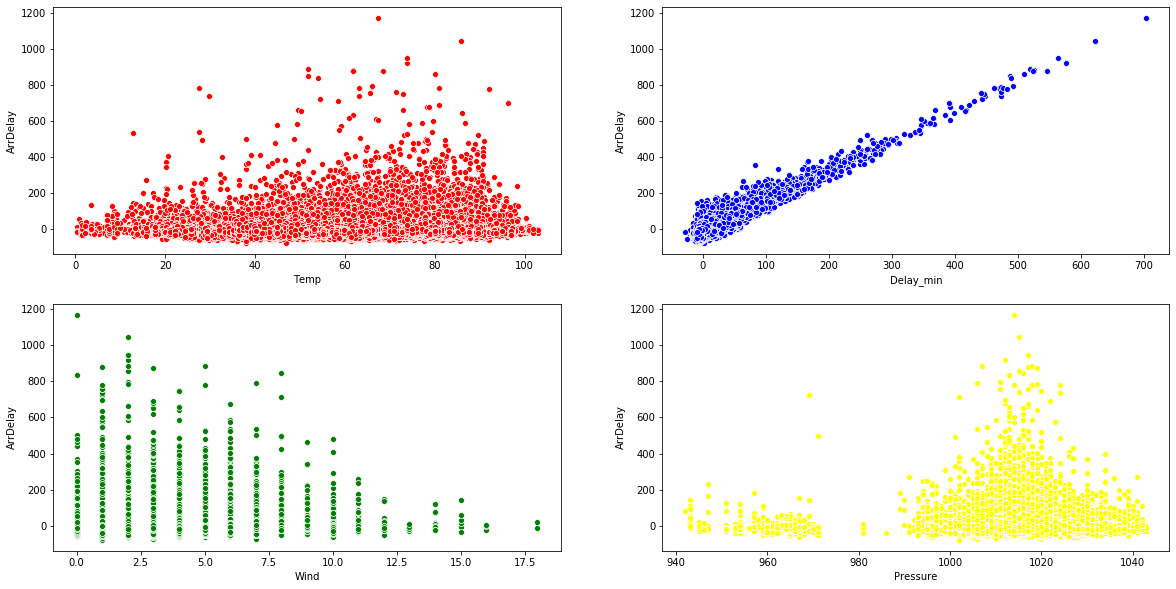

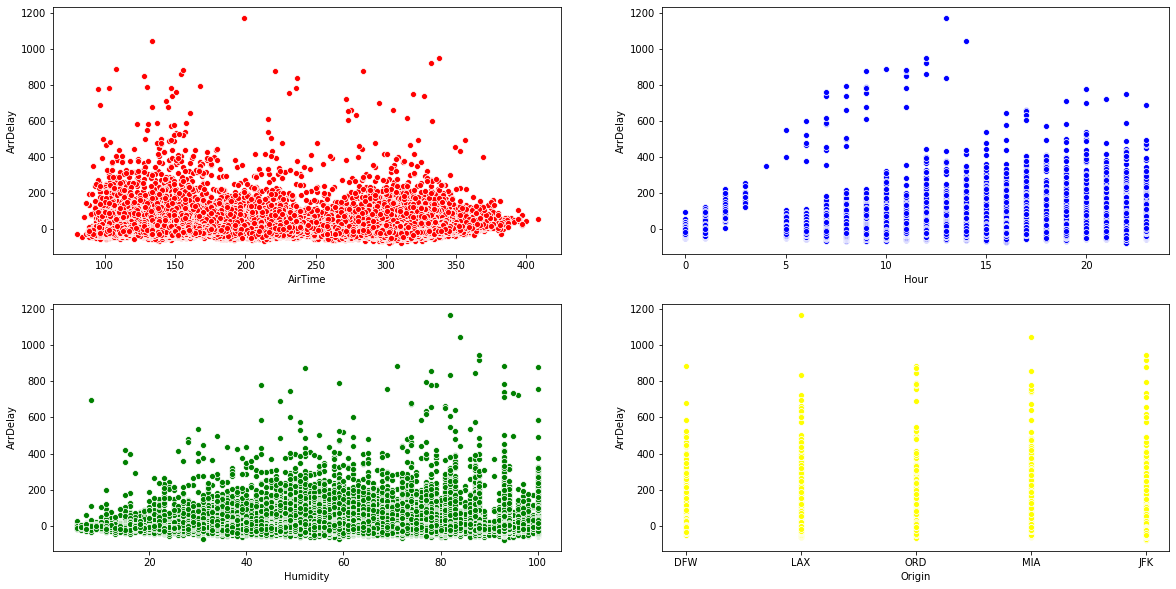

In [42]:
assumptions_check(data)

The delay minutes correlates highly positively with departure delay and arrival delay
The next step is to check for Linearity amongst the independent and dependent variables
Delay minutes is the only independent variable that shows some sort of linearity between the target variable and the independent variables.

In [48]:
from analysis import normality_check

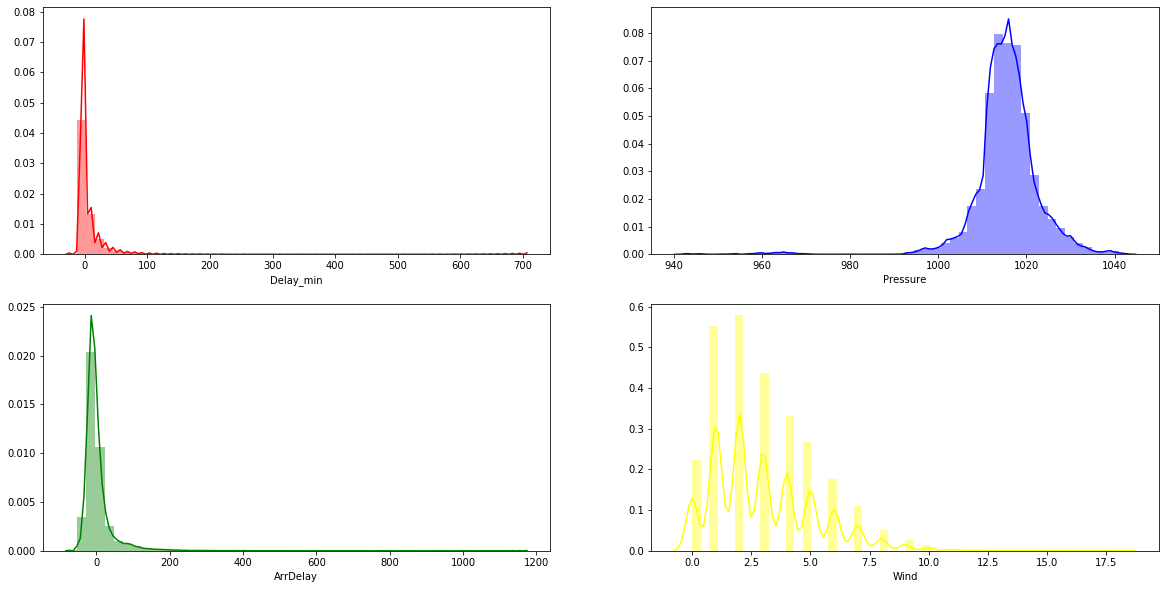

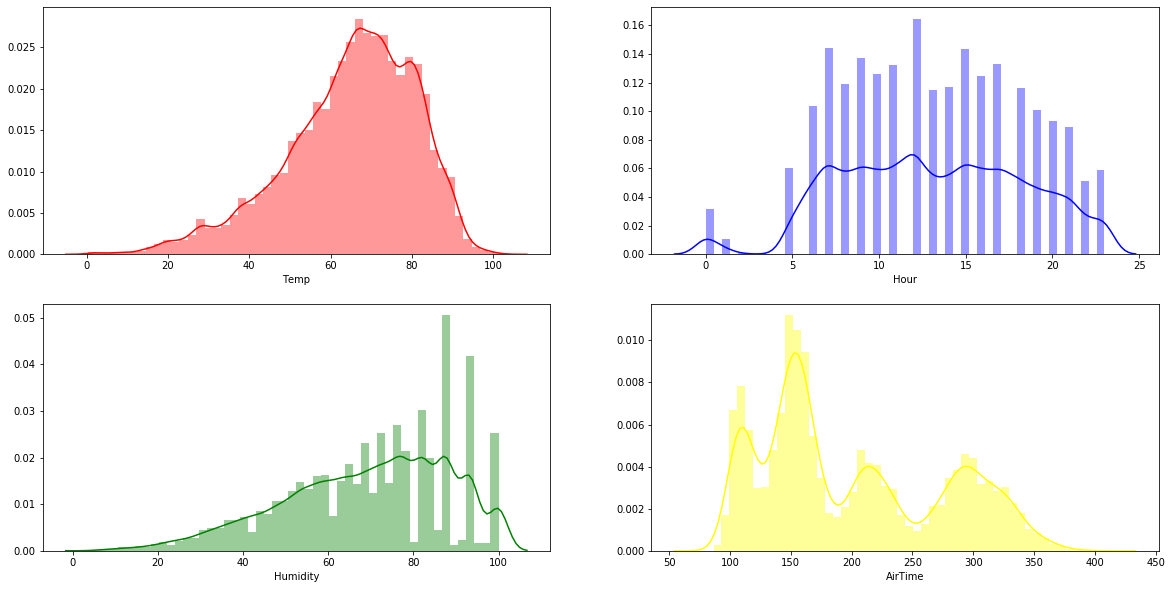

In [49]:
normality_check(data)

Plotting the distributions of the variables above :

It is evident from the plots above that none of the plots are normally distributed especially the wind distribution plot which looks more categorical than continuous. The distributions are skewed either to the right or to the left.
Temperature independent variable is the closest to a normal distribution for all the plots.
We can conclude that none of the variables passes the normality check

We have gleaned from the data that the strongest predictor for Arrival Delay is the Delay Minutes...next step is to find if passes the assumption of homoscedasticity

In [62]:
from analysis import homoscedasticity_check

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 2.972e+05
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:06:40   Log-Likelihood:            -2.8968e+05
No. Observations:               66180   AIC:                         5.794e+05
Df Residuals:                   66178   BIC:                         5.794e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.0831      0.077    -91.903      0.0

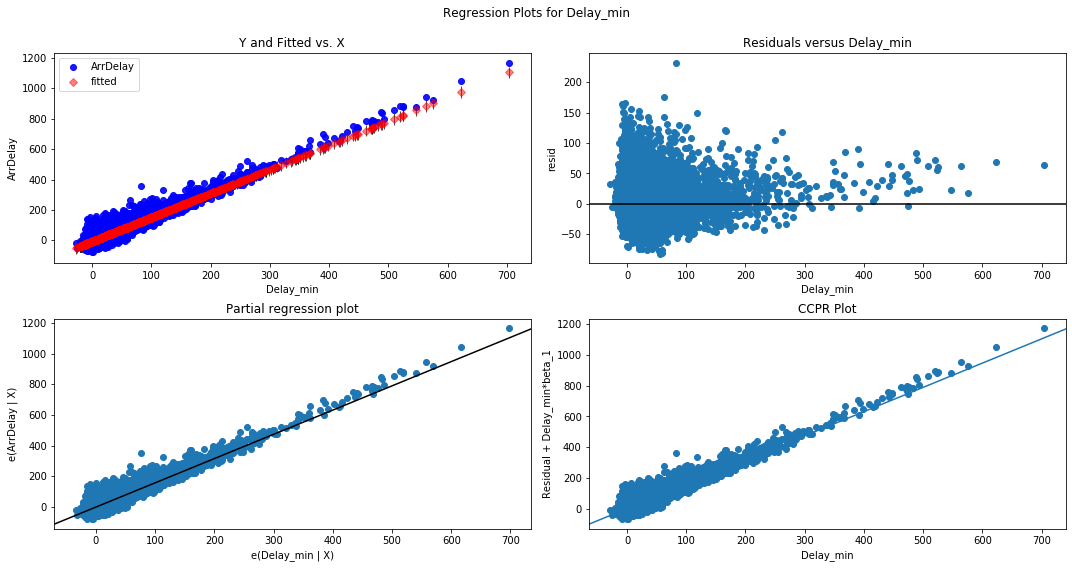

/Users/yusufolodo/Documents/FlatIron /NewProject4/FlightDelays/analysis.py:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


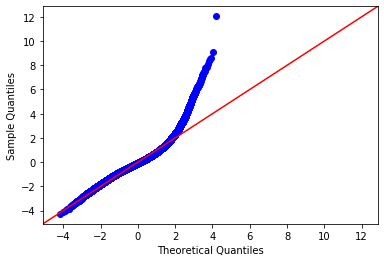

In [63]:
homoscedasticity_check(data)

This shows that the predictor variable Delay minute is a strong predictor of Arrival Delay.The R-squared value is 0.818 i.e. 81.8% of the variance in the target variable can be explained by Delay minutes. 
This residual plot above is going by the homoscedasticity assumption for the predictor variable Delay minute and as we can see from the plot above it is heteroscedastic as there is unequal variance in the residuals.
And also judging by the Q-Q plot the it shows signs of residuals normality but tails off at the top of the line

We can solve the assumptions problem by preprocessing the data and making sure outliers do not affect the model to get a better performance

## 3. MODELLING